In [37]:
from sqlalchemy import extract, desc
import datetime
import time
import MetaTrader5 as mt5
import pandas as pd
import matplotlib.pyplot as plt
import options_estrategies as opt_est
from options_estrategies import Option_Due, InformationType
import models as model

In [2]:
if not mt5.initialize():
    print("initialize() failed")
    mt5.shutdown()

estrategies = opt_est.options_estrategies(model, model.PETR4, model.PETR4_OPTIONS)

In [3]:
def convert_dict_from_update_ticks_to_dataframe(tick_data):
    df_tick_data = pd.DataFrame.from_dict(tick_data)
    df_tick_data = df_tick_data.drop(columns=['_sa_instance_state','timestamp_option','days_to_due_date'])
    df_tick_data['ratio'] = df_tick_data['last_tick'] - df_tick_data['last_tick'].shift(1)
    df_tick_data['buttefly_price'] = df_tick_data['last_tick'].shift(-1) - (2*df_tick_data['last_tick']) + df_tick_data['last_tick'].shift(1)
    
    df_tick_data = df_tick_data[
        ['option_name', 'strike', 'last_tick']
    ]      
    
    
    #df_tick_data = df_tick_data[['option_name', 'strike', 'bid', 'ask', 'last_tick','ratio','stock_price','deal_type_zone','updated_at']]      
    return df_tick_data


In [4]:
updated_ticks = estrategies.update_quotes(just_last_update=False,mode=InformationType.Offline)
ticks_to_process = updated_ticks[0]

options = []
for i in ticks_to_process:
    options.append(i.__dict__)



In [139]:
#dataframe_historical_ticks = convert_dict_from_update_ticks_to_dataframe(options)
tick_data = options

df_tick_data = pd.DataFrame.from_dict(tick_data)
df_tick_data = df_tick_data.set_index('updated_at')
df_tick_data = df_tick_data.between_time('10:15', '16:45')
df_tick_data = df_tick_data.reset_index()
df_tick_data = df_tick_data.drop(columns=['_sa_instance_state','timestamp_option','days_to_due_date'])
df_tick_data['ratio'] = df_tick_data['last_tick'] - df_tick_data['last_tick'].shift(1)

df_tick_data['cost_butterfly'] = round(df_tick_data['ask'].shift(1) - (2*df_tick_data['bid']) + df_tick_data['ask'].shift(-1),2)
df_tick_data['broken_wing'] = round(df_tick_data['strike'].shift(1) - (2*df_tick_data['strike']) + df_tick_data['strike'].shift(-1),2)

df_tick_data['cost_trava_alta'] = round(df_tick_data['ask'] - df_tick_data['bid'].shift(-1),2)
df_tick_data['anakha_1.3'] = round(df_tick_data['ask'] - (1.333 * df_tick_data['bid'].shift(-1)),2)
df_tick_data['anakha_1.3_pct_change'] = df_tick_data['anakha_1.3'].pct_change()

df_tick_data['anterior'] = round(df_tick_data['bid'].shift(1),2)
df_tick_data['centro'] = round(df_tick_data['bid'],2)
df_tick_data['posterior'] = round(df_tick_data['bid'].shift(-1),2)


df_tick_data = df_tick_data[
    ['updated_at','option_name', 'strike','deal_type_zone', 'bid','ask', 'anakha_1.3','anakha_1.3_pct_change'] # ,'ratio','cost_butterfly','broken_wing','cost_trava_alta']
]   

df_tick_data

,updated_at,option_name,strike,deal_type_zone,bid,ask,anakha_1.3,anakha_1.3_pct_change
0,2021-07-16 10:15:10.020,PETRH264,25.71,ITM,2.02,2.36,-0.04,NaN
1,2021-07-16 10:15:10.020,PETRH229,25.96,ITM,1.80,2.16,-0.21,4.250000
2,2021-07-16 10:15:10.020,PETRH269,26.21,ITM,1.78,1.84,-0.28,0.333333
3,2021-07-16 10:15:10.020,PETRH254,26.46,ITM,1.59,1.67,-0.30,0.071429
4,2021-07-16 10:15:10.020,PETRH274,26.71,ITM,1.48,1.50,-0.26,-0.133333
...,...,...,...,...,...,...,...,...
26414,2021-07-16 16:44:54.387,PETRH247,27.96,OTM,0.65,0.66,-0.10,-0.166667
26415,2021-07-16 16:44:54.387,PETRH289,28.21,OTM,0.57,0.58,-0.09,-0.100000
26416,2021-07-16 16:44:54.387,PETRH279,28.46,OTM,0.50,0.51,-0.06,-0.333333
26417,2021-07-16 16:44:54.387,PETRH294,28.71,OTM,0.43,0.44,-0.05,-0.166667


,updated_at,option_name,strike,deal_type_zone,bid,ask,anakha_1.3,anakha_1.3_pct_change
21623,2021-07-16 15:33:49.020,PETRH243,28.96,OTM,0.40,0.41,-0.06,0.200000
8427,2021-07-16 12:19:12.723,PETRH269,26.21,ITM,1.62,1.66,-0.30,0.200000
23017,2021-07-16 15:54:29.160,PETRH243,28.96,OTM,0.40,0.41,-0.06,0.200000
8424,2021-07-16 12:19:12.723,PETRH246,25.46,ITM,1.99,2.33,-0.12,0.200000
21691,2021-07-16 15:34:49.490,PETRH243,28.96,OTM,0.40,0.41,-0.06,0.200000
...,...,...,...,...,...,...,...,...
17685,2021-07-16 14:35:50.183,PETRH246,25.46,ITM,1.99,2.33,-0.12,-0.586207
16336,2021-07-16 14:16:25.167,PETRH246,25.46,ITM,1.99,2.33,-0.12,-0.586207
8339,2021-07-16 12:17:57.137,PETRH264,25.71,ITM,1.84,2.10,-0.07,-0.588235
7454,2021-07-16 12:04:50.960,PETRH264,25.71,ITM,1.99,2.03,-0.18,-0.590909


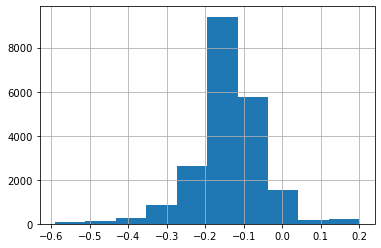

In [159]:
orderned = df_tick_data.sort_values(by='anakha_1.3_pct_change', ascending=False).copy()

orderned = orderned[(orderned['anakha_1.3_pct_change'] < 0.20) & (orderned['anakha_1.3_pct_change'] > -0.60)]

orderned['anakha_1.3_pct_change'].hist()
orderned

<Figure size 576x648 with 0 Axes>

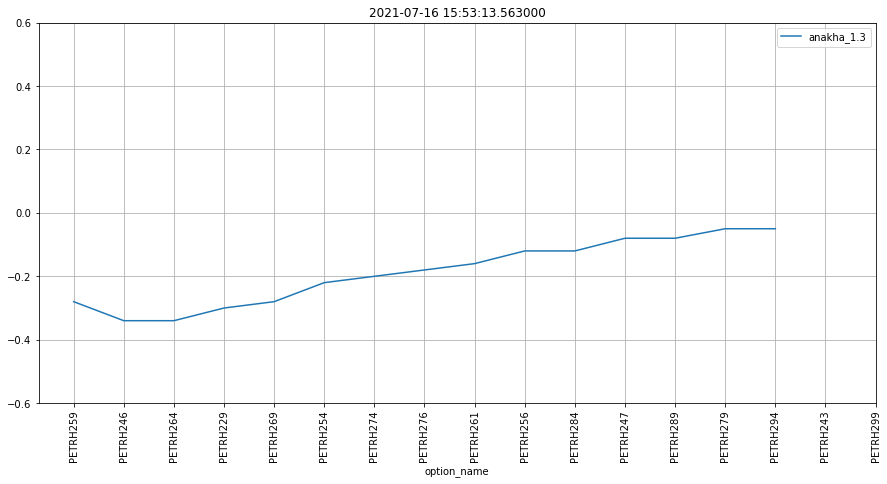

<Figure size 576x648 with 0 Axes>

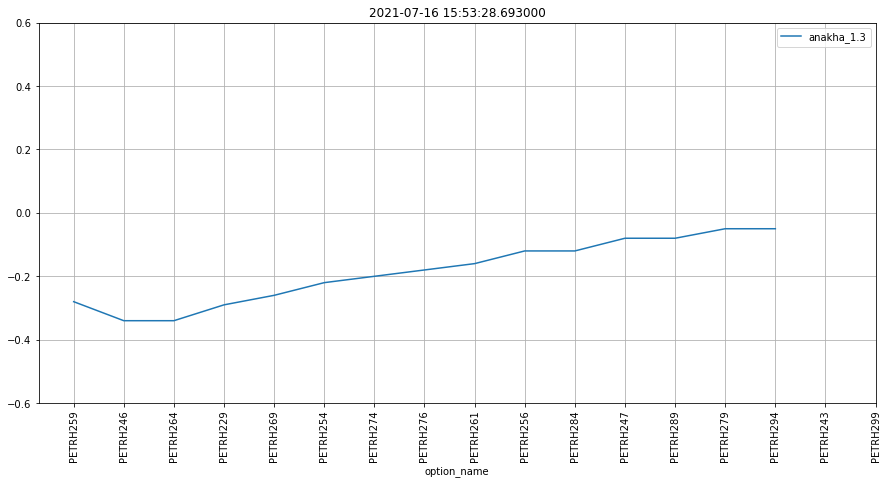

<Figure size 576x648 with 0 Axes>

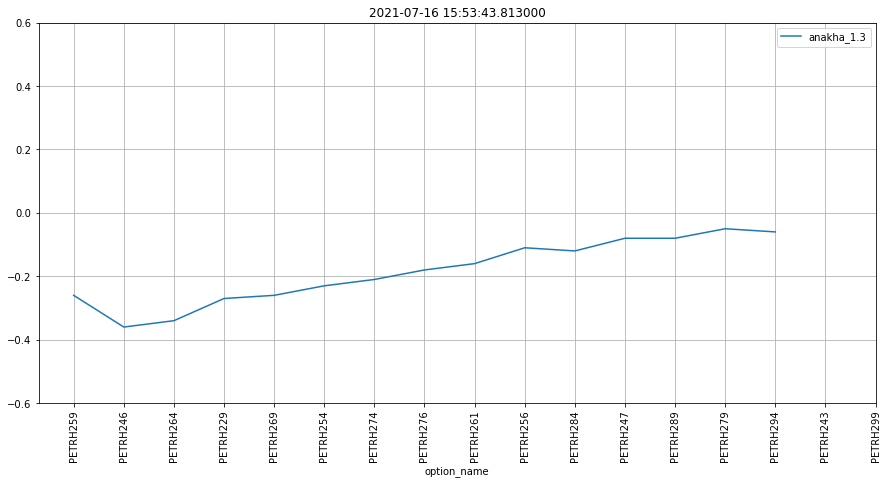

<Figure size 576x648 with 0 Axes>

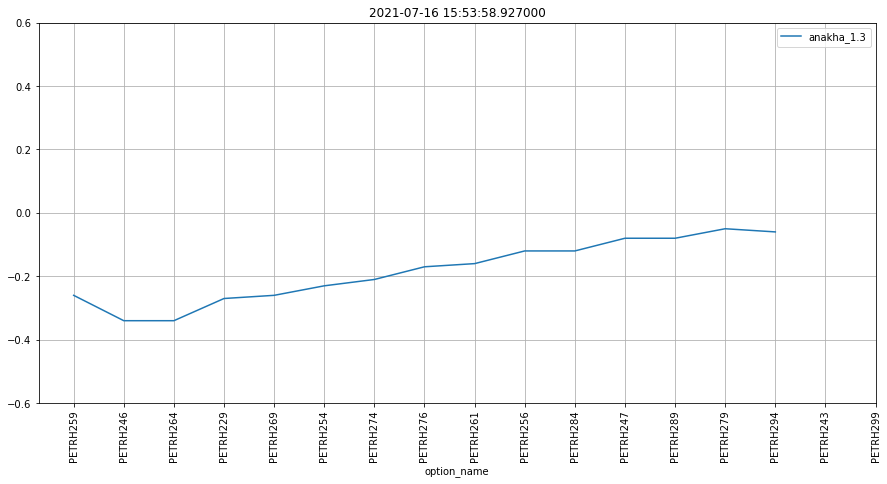

<Figure size 576x648 with 0 Axes>

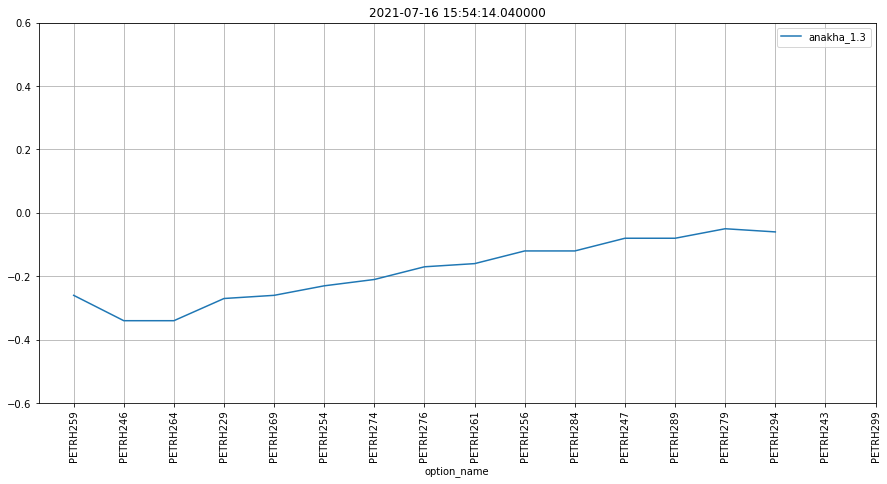

<Figure size 576x648 with 0 Axes>

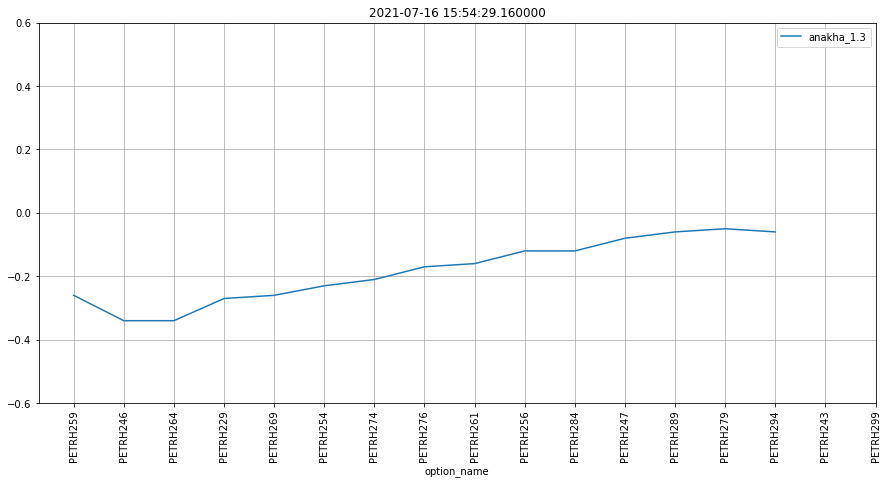

<Figure size 576x648 with 0 Axes>

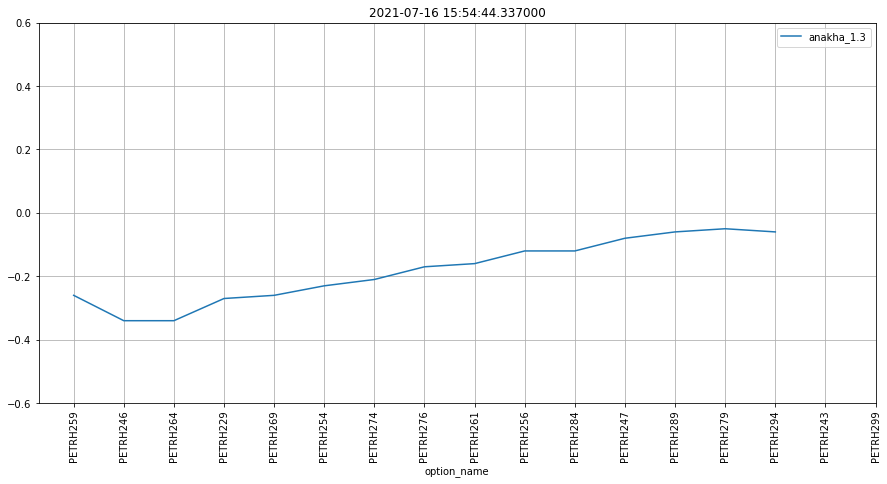

<Figure size 576x648 with 0 Axes>

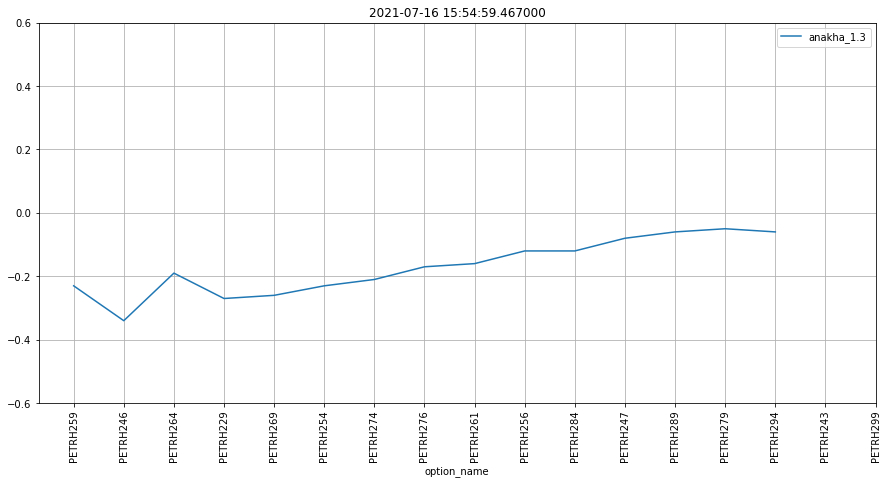

<Figure size 576x648 with 0 Axes>

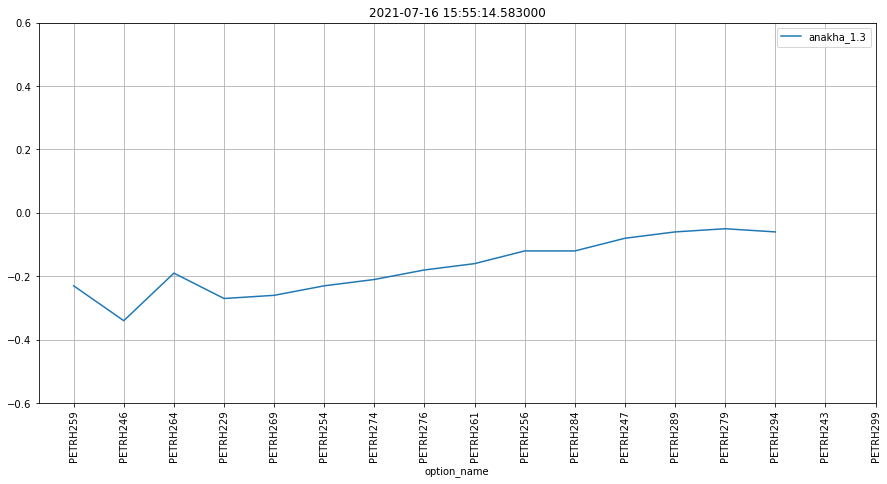

<Figure size 576x648 with 0 Axes>

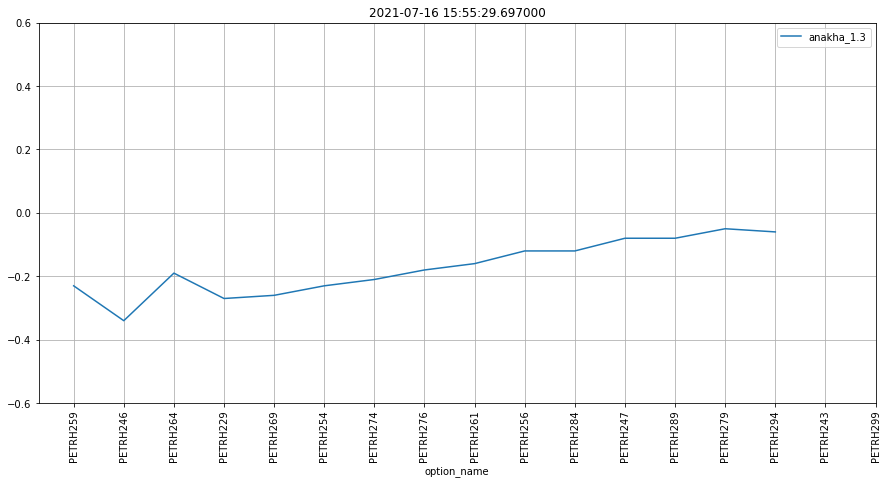

<Figure size 576x648 with 0 Axes>

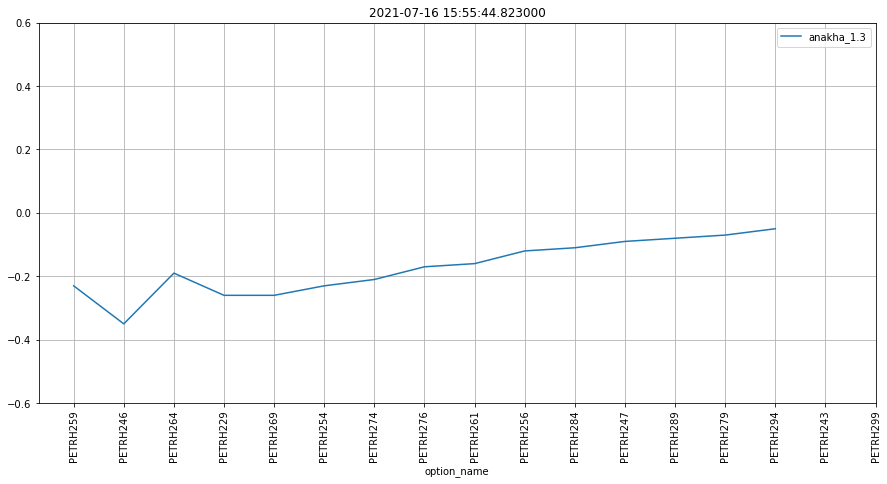

<Figure size 576x648 with 0 Axes>

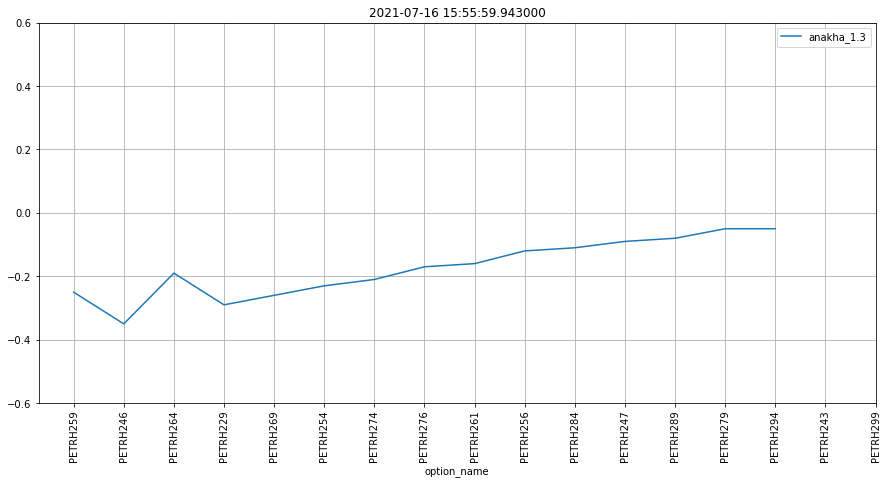

<Figure size 576x648 with 0 Axes>

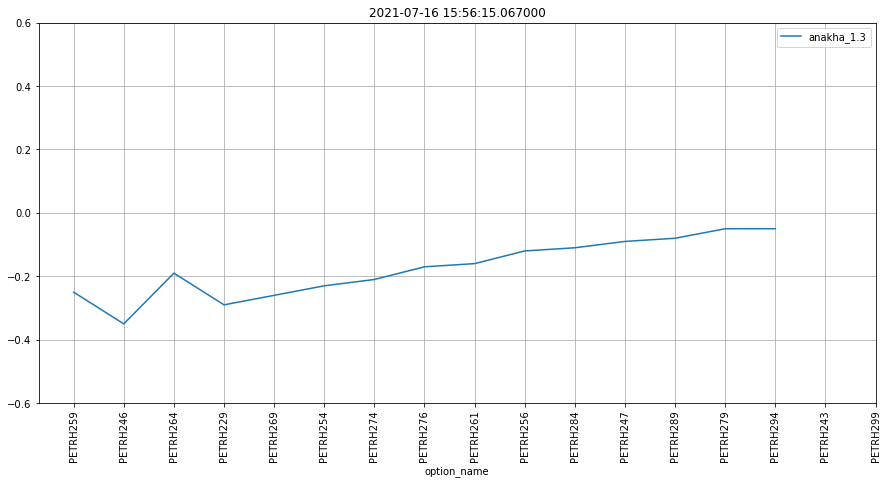

<Figure size 576x648 with 0 Axes>

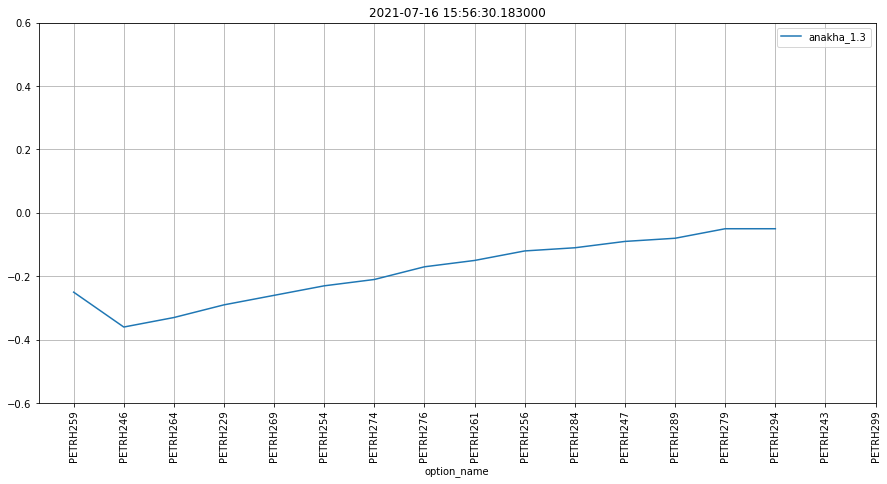

<Figure size 576x648 with 0 Axes>

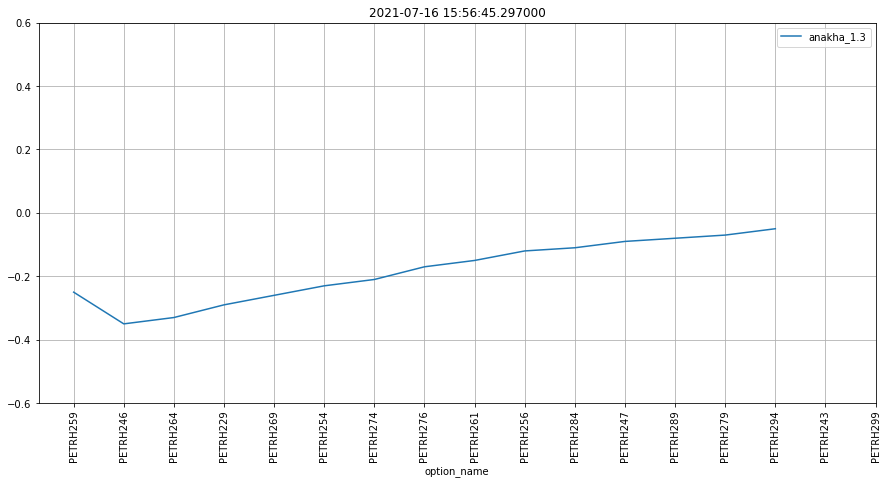

In [183]:
datetime_ticks = df_tick_data[(df_tick_data['updated_at'] > '2021-07-16 00:00:01') & (df_tick_data['updated_at'] <'2021-07-16 23:59:59')]
datetime_ticks = datetime_ticks.set_index('updated_at')
datetime_ticks = datetime_ticks.between_time('15:53', '15:57')

upload_datetime = datetime_ticks.index.unique()
unique_options = datetime_ticks['option_name'].unique()


#2021-07-16 16:37:35.730
#PETRH243

for itm in upload_datetime:
    plot_dataframe = df_tick_data[(df_tick_data['updated_at'] == itm)]
    title = plot_dataframe.iloc[0]['updated_at']
    plot_dataframe = plot_dataframe[1:len(plot_dataframe)-1]
    plt.figure(figsize=(8,9))
    
    ax = plot_dataframe.plot(title=title, x="option_name", y=["anakha_1.3"],figsize=(15,7),ylim=(-0.60,0.60),grid=True)

    unique_options = datetime_ticks['option_name'].unique()
    options_name = list(unique_options)
    plt.xticks(range(0,len(options_name)), options_name, rotation='vertical')


    plt.show()
    plot_dataframe

In [176]:
len(datetime_ticks['option_name'].unique())

18

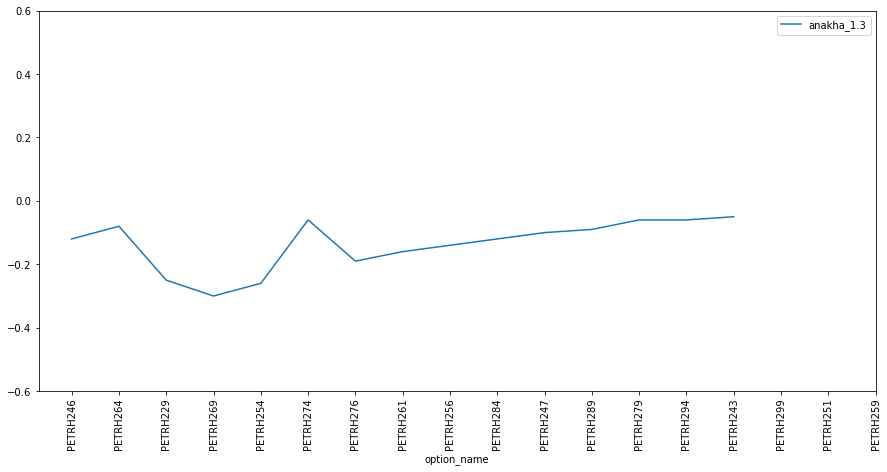

,updated_at,option_name,strike,deal_type_zone,bid,ask,anakha_1.3,anakha_1.3_pct_change
8424,2021-07-16 12:19:12.723,PETRH246,25.46,ITM,1.99,2.33,-0.12,0.200000
8425,2021-07-16 12:19:12.723,PETRH264,25.71,ITM,1.84,2.09,-0.08,-0.333333
8426,2021-07-16 12:19:12.723,PETRH229,25.96,ITM,1.63,1.91,-0.25,2.125000
8427,2021-07-16 12:19:12.723,PETRH269,26.21,ITM,1.62,1.66,-0.30,0.200000
8428,2021-07-16 12:19:12.723,PETRH254,26.46,ITM,1.47,1.50,-0.26,-0.133333
8429,2021-07-16 12:19:12.723,PETRH274,26.71,ITM,1.32,1.35,-0.06,-0.769231
8430,2021-07-16 12:19:12.723,PETRH261,27.21,OTM,1.06,1.08,-0.19,2.166667
8431,2021-07-16 12:19:12.723,PETRH256,27.46,OTM,0.95,0.96,-0.16,-0.157895
8432,2021-07-16 12:19:12.723,PETRH284,27.71,OTM,0.84,0.85,-0.14,-0.125000
8433,2021-07-16 12:19:12.723,PETRH247,27.96,OTM,0.74,0.75,-0.12,-0.142857


In [180]:
plot_dataframe = df_tick_data[(df_tick_data['updated_at'] == '2021-07-16 12:19:12.723')]
plot_dataframe = plot_dataframe[1:len(plot_dataframe)-1]
ax = plot_dataframe.plot(x="option_name", y=["anakha_1.3"],figsize=(15,7),ylim=(-0.60,0.60),x_compat=True)

unique_options = datetime_ticks['option_name'].unique()
options_name = list(unique_options)
plt.xticks(range(0,len(options_name)), options_name, rotation='vertical')


plt.show()
plot_dataframe

In [120]:
plot_dataframe['var'] = plot_dataframe['anakha_1.3'].pct_change()
plot_dataframe

,updated_at,option_name,strike,deal_type_zone,bid,ask,anakha_1.3,var
27657,2021-07-15 10:31:25.840,PETRH229,25.96,ITM,2.22,2.26,-0.46,NaN
27658,2021-07-15 10:31:25.840,PETRH269,26.21,ITM,2.04,2.08,-0.40,-0.130435
27659,2021-07-15 10:31:25.840,PETRH254,26.46,ITM,1.86,1.91,-0.38,-0.050000
27660,2021-07-15 10:31:25.840,PETRH274,26.71,ITM,1.72,1.75,-0.33,-0.131579
27661,2021-07-15 10:31:25.840,PETRH276,26.96,ITM,1.56,1.59,-0.30,-0.090909
27662,2021-07-15 10:31:25.840,PETRH261,27.21,ITM,1.42,1.44,-0.09,-0.700000
27663,2021-07-15 10:31:25.840,PETRH284,27.71,OTM,1.15,1.17,-0.20,1.222222
27664,2021-07-15 10:31:25.840,PETRH247,27.96,OTM,1.03,1.06,-0.18,-0.100000
27665,2021-07-15 10:31:25.840,PETRH289,28.21,OTM,0.93,0.95,-0.14,-0.222222
27666,2021-07-15 10:31:25.840,PETRH279,28.46,OTM,0.82,0.84,-0.13,-0.071429


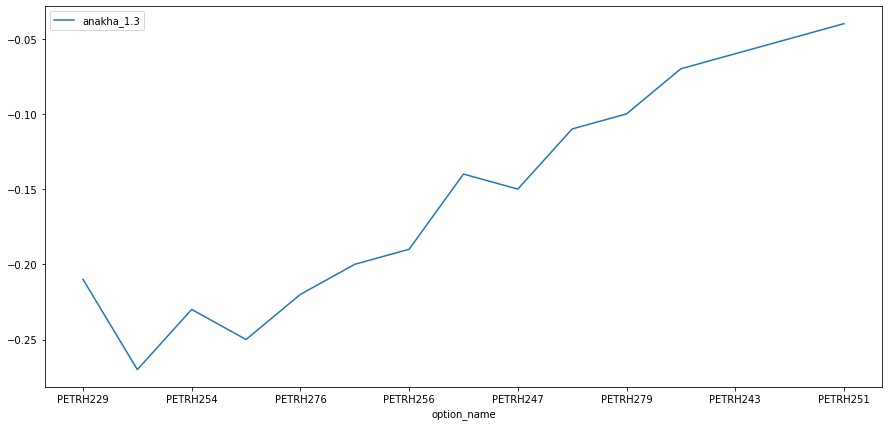

,updated_at,option_name,strike,deal_type_zone,bid,ask,anakha_1.3
45351,2021-07-16 10:15:55.377,PETRH229,25.96,ITM,1.80,2.16,-0.21
45352,2021-07-16 10:15:55.377,PETRH269,26.21,ITM,1.78,1.85,-0.27
45353,2021-07-16 10:15:55.377,PETRH254,26.46,ITM,1.59,1.68,-0.23
45354,2021-07-16 10:15:55.377,PETRH274,26.71,ITM,1.43,1.50,-0.25
45355,2021-07-16 10:15:55.377,PETRH276,26.96,ITM,1.31,1.37,-0.22
45356,2021-07-16 10:15:55.377,PETRH261,27.21,ATM,1.19,1.21,-0.20
45357,2021-07-16 10:15:55.377,PETRH256,27.46,OTM,1.06,1.08,-0.19
45358,2021-07-16 10:15:55.377,PETRH284,27.71,OTM,0.95,0.97,-0.14
45359,2021-07-16 10:15:55.377,PETRH247,27.96,OTM,0.83,0.85,-0.15
45360,2021-07-16 10:15:55.377,PETRH289,28.21,OTM,0.75,0.76,-0.11


In [ ]:
df_tick_data[(df_tick_data['updated_at'] == '2021-07-16 16:44:39.263')]

In [ ]:
dataframe_analise = []
filtered_dataframe = df_tick_data[(df_tick_data['cost_trava_alta'] <0.06) & (df_tick_data['broken_wing'] == 0)]
filtered_dataframe_otm = df_tick_data[(df_tick_data['broken_wing'] == 0)].groupby(by='deal_type_zone').mean()

filtered_dataframe_otm

for i,v in filtered_dataframe.iterrows():
    data_ratio = df_tick_data[i:i+2].copy()
    data_ratio.insert(0, 'operation', ['C','V'])
    dataframe_analise.append(data_ratio)

    
#df_tick_data[(df_tick_data['trava_alta'] <0.01)]
dataframe_analise

In [ ]:
ratio_statistic_finder = dataframe_historical_ticks[['updated_at','option_name','ratio']]
ratio_statistic_finder = ratio_statistic_finder.set_index('updated_at')
ratio_statistic_finder = ratio_statistic_finder.between_time('10:10', '17:00')
ratio_statistic_finder = ratio_statistic_finder.reset_index()
ratio_statistic_finder = ratio_statistic_finder.pivot(index='updated_at', columns='option_name', values='ratio')
ratio_statistic_finder = ratio_statistic_finder.dropna(axis=1)
ratio_statistic_finder

ratio_statistic_data = {}
for (column, value) in ratio_statistic_finder.iteritems():
    ratio_statistic_data.update({ column: { "Mean": ratio_statistic_finder[column].mean(), "StdDev": ratio_statistic_finder[column].std(), "2xStdDev": (ratio_statistic_finder[column].std()*2)  }}) 

ratio_statistic_dataframe = pd.DataFrame.from_dict(ratio_statistic_data)
ratio_statistic_dataframe = ratio_statistic_dataframe.transpose()
ratio_statistic_dataframe

In [ ]:

updated_ticks = estrategies.update_quotes(just_last_update=True,mode=InformationType.Real_Time)
ticks_to_process = updated_ticks[0]
options_updated = []
for i in ticks_to_process:
    options_updated.append(i.__dict__)

df_options_updated = convert_dict_from_update_ticks_to_dataframe(options_updated)
df_options_updated.reset_index()
df_options_updated = df_options_updated.set_index('option_name')
df_options_updated = pd.merge(df_options_updated, ratio_statistic_dataframe, left_index=True, right_index=True)

df_options_updated['above_mean'] = abs(df_options_updated['ratio']) > abs(df_options_updated['Mean'])
df_options_updated['above_2x_std_dev'] = abs(df_options_updated['ratio']) > abs(abs(df_options_updated['Mean']) + df_options_updated['2xStdDev'])
df_options_updated['a2xStdDev_Price'] = abs(abs(df_options_updated['Mean']) + df_options_updated['2xStdDev'])
df_options_updated = df_options_updated.drop(columns=['updated_at','StdDev','2xStdDev'])
df_options_updated